In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df_strong = pd.read_csv('data/scaling_strong_cpu_2021-06-20T22:23:12.csv')
df = df_strong
df['nbytes'] = 3019898880  # forgot to save
df['workers_per_core'] = df.ncores //  df.nworkers
df['througput_MBPS'] = df.nbytes / df.runtime / 1e6
df

,operation,ncores,nworkers,shape,runtime,nbytes,workers_per_core,througput_MBPS
0,unfiltered_mean,1,1,"(360, 1024, 1024)",4.957789,3019898880,1,609.122113
1,filtered_mean,1,1,"(360, 1024, 1024)",266.211975,3019898880,1,11.343963
2,unfiltered_mean,9,9,"(360, 1024, 1024)",0.787969,3019898880,1,3832.509209
3,filtered_mean,9,9,"(360, 1024, 1024)",34.350651,3019898880,1,87.913876
4,unfiltered_mean,18,18,"(360, 1024, 1024)",0.496245,3019898880,1,6085.503924
5,filtered_mean,18,18,"(360, 1024, 1024)",19.386526,3019898880,1,155.773078
6,unfiltered_mean,27,27,"(360, 1024, 1024)",0.607206,3019898880,1,4973.434942
7,filtered_mean,27,27,"(360, 1024, 1024)",19.663129,3019898880,1,153.581808
8,unfiltered_mean,36,36,"(360, 1024, 1024)",0.483693,3019898880,1,6243.419096
9,filtered_mean,36,36,"(360, 1024, 1024)",15.830914,3019898880,1,190.759609


Text(0, 0.5, 'Throughput (MB/s)')

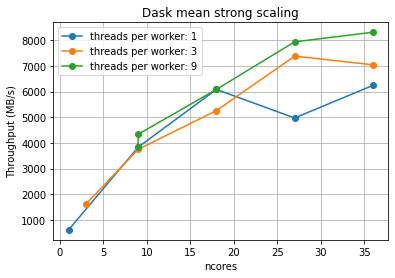

In [3]:
fig, ax = plt.subplots()

for name, group in df[df.operation=="unfiltered_mean"].groupby('workers_per_core'):
    group.plot(ax=ax, x='ncores', y='througput_MBPS', marker='o', label=f'threads per worker: {name}')

plt.grid()

ax.set_title('Dask mean strong scaling')
ax.set_ylabel('Throughput (MB/s)')

Text(0, 0.5, 'Throughput (MB/s)')

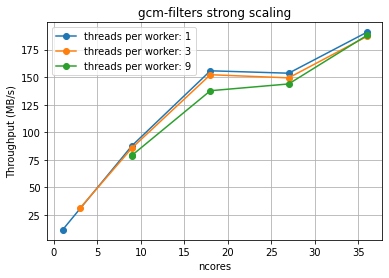

In [4]:
fig, ax = plt.subplots()

for name, group in df[df.operation=="filtered_mean"].groupby('workers_per_core'):
    group.plot(ax=ax, x='ncores', y='througput_MBPS', marker='o', label=f'threads per worker: {name}')

plt.grid()

ax.set_title('gcm-filters strong scaling')
ax.set_ylabel('Throughput (MB/s)')

In [5]:
df_weak = pd.read_csv('data/scaling_weak_cpu_2021-06-20T22:23:12.csv')
df = df_weak
df['workers_per_core'] = df.ncores //  df.nworkers
df['througput_MBPS'] = df.nbytes / df.runtime / 1e6
df

,operation,ncores,nworkers,shape,chunks,nbytes,dtype,runtime,workers_per_core,througput_MBPS
0,unfiltered_mean,1,1,"(40, 1024, 1024)","(10, 1024, 1024)",335544320,float64,0.665818,1,503.957856
1,filtered_mean,1,1,"(40, 1024, 1024)","(10, 1024, 1024)",335544320,float64,31.714970,1,10.579998
2,unfiltered_mean,9,9,"(360, 1024, 1024)","(10, 1024, 1024)",3019898880,float64,0.780558,1,3868.899303
3,filtered_mean,9,9,"(360, 1024, 1024)","(10, 1024, 1024)",3019898880,float64,36.267838,1,83.266580
4,unfiltered_mean,18,18,"(720, 1024, 1024)","(10, 1024, 1024)",6039797760,float64,1.054792,1,5726.054815
5,filtered_mean,18,18,"(720, 1024, 1024)","(10, 1024, 1024)",6039797760,float64,39.887314,1,151.421523
6,unfiltered_mean,27,27,"(1080, 1024, 1024)","(10, 1024, 1024)",9059696640,float64,0.888058,1,10201.698100
7,filtered_mean,27,27,"(1080, 1024, 1024)","(10, 1024, 1024)",9059696640,float64,48.964565,1,185.025574
8,unfiltered_mean,36,36,"(1440, 1024, 1024)","(10, 1024, 1024)",12079595520,float64,1.069927,1,11290.112108
9,filtered_mean,36,36,"(1440, 1024, 1024)","(10, 1024, 1024)",12079595520,float64,63.402950,1,190.521032


Text(0, 0.5, 'Throughput (MB/s)')

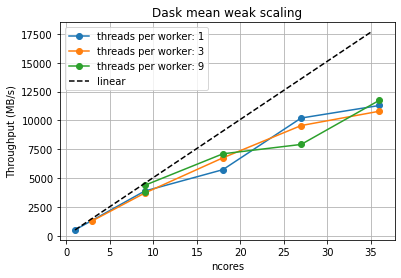

In [6]:
fig, ax = plt.subplots()

for name, group in df[df.operation=="unfiltered_mean"].groupby('workers_per_core'):
    group.plot(ax=ax, x='ncores', y='througput_MBPS', marker='o', label=f'threads per worker: {name}')

plt.grid()

linear = df[(df.ncores==1) & (df.operation=='unfiltered_mean')].througput_MBPS.values.item()
ax.plot(np.arange(1, 36), linear * np.arange(1, 36), color='k', linestyle='--', label='linear')
plt.legend()

ax.set_title('Dask mean weak scaling')
ax.set_ylabel('Throughput (MB/s)')

Text(0, 0.5, 'Throughput (MB/s)')

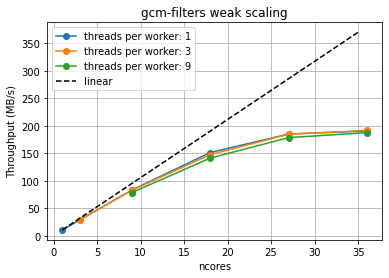

In [7]:
fig, ax = plt.subplots()

for name, group in df[df.operation=="filtered_mean"].groupby('workers_per_core'):
    group.plot(ax=ax, x='ncores', y='througput_MBPS', marker='o', label=f'threads per worker: {name}')

linear = df[(df.ncores==1) & (df.operation=='filtered_mean')].througput_MBPS.values.item()
ax.plot(np.arange(1, 36), linear * np.arange(1, 36), color='k', linestyle='--', label='linear')
plt.legend()    
    
plt.grid()

ax.set_title('gcm-filters weak scaling')
ax.set_ylabel('Throughput (MB/s)')